This document is a review of https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Titanic

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## groupby() and unstack()

In [4]:
titanic.groupby(['sex','class'])[['survived']].agg(['mean']).index.get_level_values('class')

CategoricalIndex([u'First', u'Second', u'Third', u'First', u'Second',
                  u'Third'],
                 categories=[u'First', u'Second', u'Third'], ordered=False, name=u'class', dtype='category')

In [5]:
titanic.groupby(['sex','class'])[['survived']].agg(['mean']).reset_index()

,sex,class,survived
,,,mean
0,female,First,0.968085
1,female,Second,0.921053
2,female,Third,0.500000
3,male,First,0.368852
4,male,Second,0.157407
5,male,Third,0.135447


In [6]:
titanic.groupby(['sex','class'])[['survived']].agg(['mean'])

survived
                   mean
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [7]:
titanic.groupby(['sex','class'])[['survived']].agg(['mean']).unstack()

survived                    
            mean                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

## pivot_table()

In [8]:
titanic.pivot_table(index='sex',columns='class',values='survived') # default agg function is np.mean()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table(index=['sex',age],columns='class',values='survived')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [10]:
fare = pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            [0, 14.454]                     (14.454, 512.329]            \
class                 First    Second     Third             First    Second   
sex    age                                                                    
female (0, 18]          NaN  1.000000  0.714286          0.909091  1.000000   
       (18, 80]         NaN  0.880000  0.444444          0.972973  0.914286   
male   (0, 18]          NaN  0.000000  0.260870          0.800000  0.818182   
       (18, 80]         0.0  0.098039  0.125000          0.391304  0.030303   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.318182  
       (18, 80]  0.391304  
male   (0, 18]   0.178571  
       (18, 80]  0.192308

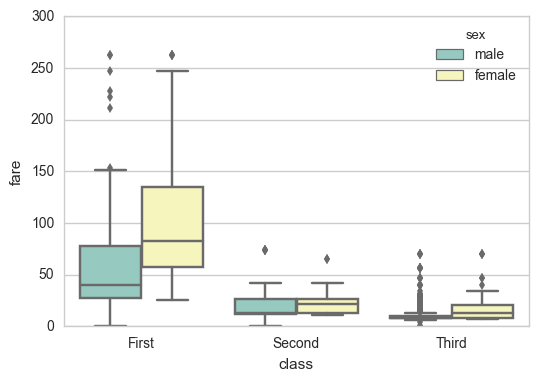

In [28]:
## relationship between class and fare??
fig, ax = plt.subplots(figsize=(6,4))
sns.set_style("whitegrid")

# remove extreme value for fair
titanic_fair_nobad = titanic[titanic.fare<500]
sns.boxplot(ax=ax,x='class',y='fare',data=titanic_fair_nobad,hue='sex',palette="Set3")

In [29]:
titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':'sum','fare':'mean'})
# sum and np.mean without quotation marks works because sum is a python function but mean is not

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810     91.0   70.0  72.0
male     67.226127  19.741782  12.661633     45.0   17.0  47.0

In [30]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Birth

In [31]:
births = pd.read_csv('data/births.csv')

In [32]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [33]:
births['decade'] = 10*(births['year']//10)
decade_gender = births.pivot_table(index='decade',columns=['gender'],aggfunc={'births':'sum'})

In [34]:
decade_gender

births          
gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

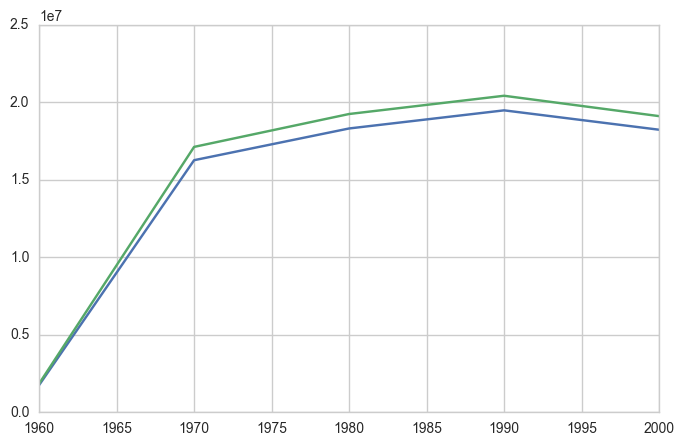

In [35]:
# sns.set_style("whitegrid")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(decade_gender)

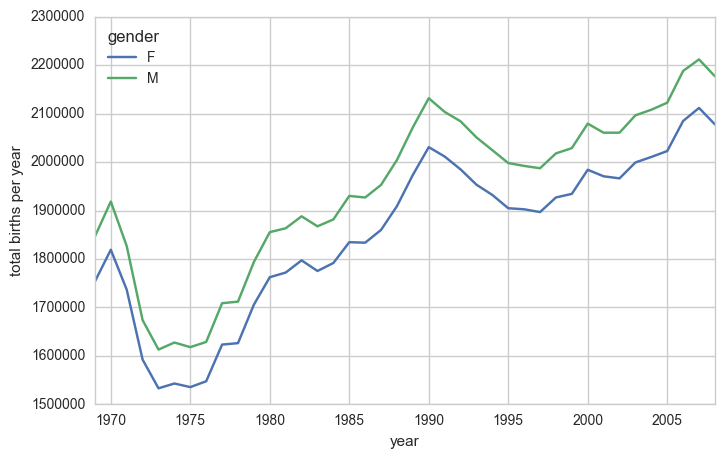

In [36]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
births.pivot_table(values='births',index='year',columns='gender',aggfunc='sum').plot(ax=ax1)
plt.ylabel('total births per year')

## sigma clipping operation

In [37]:
quartiles = np.percentile(births['births'],[25,50,75])
mu = quartiles[1]
# 0.74 is interquantile range of a gaussian distribution
sig = 0.74*(quartiles[2]-quartiles[0])

births = births.query('(births > @mu-5*@sig) & (births < @mu+5*@sig)')

In [38]:
births['day'] = births['day'].astype(int)

In [39]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

In [40]:
decade_birth = births.pivot_table('births', index='dayofweek',columns='decade');decade_birth

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


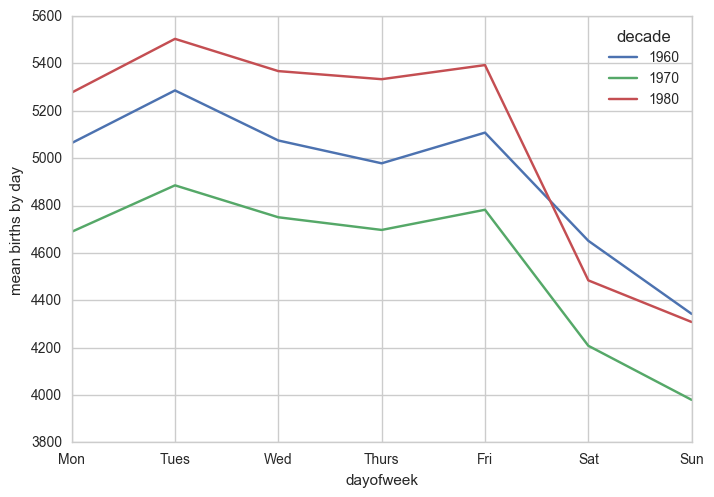

In [41]:
decade_birth.plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

Realize that 1990 and 2000 do not appear in the plot because their records are dropped using sigma clipping operation. 1990 and 2000 decades do not have daily record; instead, their births are monthly aggregated results.

In [42]:
births_by_date = births.pivot_table(values='births',index=[births.index.month, births.index.day])
births_by_date.head()

1  1    4009.225
   2    4247.400
   3    4500.900
   4    4571.350
   5    4603.625
Name: births, dtype: float64

In [43]:
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]
births_by_date.head()

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
Name: births, dtype: float64

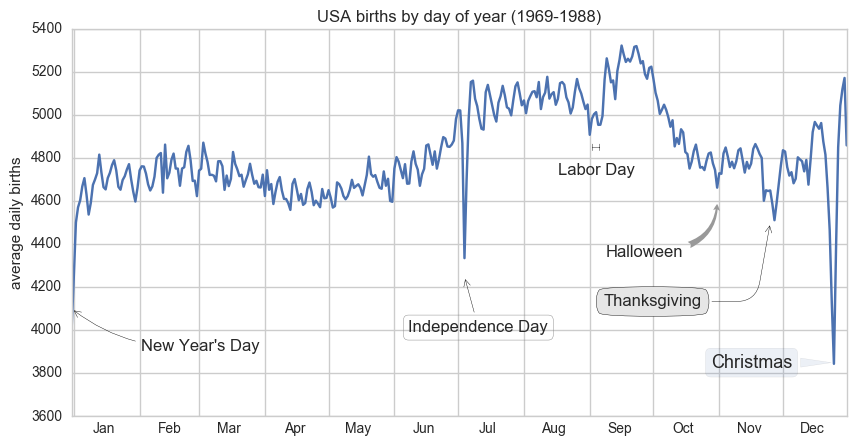

In [44]:

fig, ax = plt.subplots(figsize=(10,5))
births_by_date.plot(ax=ax)
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);